# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import sys
import os

# Add project root to path
sys.path.append(os.path.abspath(".."))

# Import custom modules from src package
from src import (
    load_data, 
    downsample_data,
    cast_types,
    label_churn,
    plot_churn_distribution, 
    plot_avg_songs_per_session, 
    plot_error_frequency, 
    plot_user_journeys
)

np.random.seed(42)

In [2]:
df = load_data('../data/train.parquet')
df.sample(5)

,status,gender,firstName,level,lastName,userId,ts,auth,page,sessionId,location,itemInSession,userAgent,method,length,song,artist,time,registration
8415245,200,M,August,paid,Clark,1207487,1540518498000,Logged In,NextSong,112798,"Riverside-San Bernardino-Ontario, CA",400,Mozilla/5.0 (Windows NT 6.1; Trident/7.0; rv:1...,PUT,236.04200,Hostile [Live Version],Pantera,2018-10-26 01:48:18,2018-09-10 17:03:47
12828473,200,F,Alani,paid,Kane,1325330,1541672419000,Logged In,NextSong,159518,"Tampa-St. Petersburg-Clearwater, FL",74,Mozilla/5.0 (Windows NT 6.1; rv:31.0) Gecko/20...,PUT,194.03710,Karibien,Air France,2018-11-08 10:20:19,2018-09-05 06:02:19
13490632,200,F,Angelina,paid,Singh,1495032,1541826321000,Logged In,NextSong,174513,"Santa Maria-Santa Barbara, CA",216,"""Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like...",PUT,278.07302,Through The Wire,Kanye West,2018-11-10 05:05:21,2018-08-24 13:24:27
9329450,200,M,Nathaniel,paid,Norris,1525270,1540794304000,Logged In,NextSong,128771,"San Francisco-Oakland-Hayward, CA",120,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",PUT,132.85832,Ride A White Swan,T. Rex,2018-10-29 06:25:04,2018-06-23 13:42:06
13901146,200,M,Landyn,paid,Evans,1849720,1541985370000,Logged In,NextSong,179047,"Atlanta-Sandy Springs-Roswell, GA",74,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",PUT,266.65751,Black Planet (Remastered),Sisters Of Mercy,2018-11-12 01:16:10,2018-08-25 21:44:42


## Dataset Size Analysis & Sampling
Analyze the size of the dataset and downsample for preliminary exploration to speed up execution.

In [3]:
# Check dataset size and memory usage
print(f"Dataset Shape: {df.shape}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset Shape: (17499636, 19)
Memory Usage: 15633.13 MB
Memory Usage: 15633.13 MB


In [4]:
# Downsample for exploration if dataset is large
df = downsample_data(df, fraction=0.1, random_state=42)

Downsampling to 10.0% of users...
New Dataset Shape: (1661025, 19)
New Dataset Shape: (1661025, 19)


## Data Cleaning

- **Type Casting**: Ensure `userId` is a string and `ts`/`registration` are datetime objects.
- **Missing Values**: Analyze and handle `NaN` values (especially in `userId`).

In [5]:
# Type Casting and Cleaning
df = cast_types(df)

print("\nData shape after cleaning:", df.shape)
df.sample(5)


Data shape after cleaning: (1661025, 19)


,status,gender,firstName,level,lastName,userId,ts,auth,page,sessionId,location,itemInSession,userAgent,method,length,song,artist,time,registration
14562368,200,F,Jazmyn,paid,Garcia,1509354,2018-11-13 21:33:37,Logged In,NextSong,185831,"San Diego-Carlsbad, CA",47,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,PUT,267.65016,The Only Exception (Album Version),Paramore,2018-11-13 21:33:37,2018-09-02 07:49:53
13710223,200,M,Ian,free,Whitney,1568679,2018-11-11 04:24:57,Logged In,NextSong,151503,"Charlottesville, VA",21,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,261.32853,Shampoo,Elvis Perkins In Dearland,2018-11-11 04:24:57,2018-09-15 03:57:23
22223378,200,M,Mark,paid,Stein,1206975,2018-11-03 15:48:54,Logged In,NextSong,21981,"Corsicana, TX",46,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",PUT,355.00363,(You're Puttin') A Rush On Me,Stephanie Mills,2018-11-03 15:48:54,2018-08-26 13:16:36
9923099,200,M,Dylan,free,Hoffman,1552461,2018-10-30 19:13:40,Logged In,NextSong,136647,"El Paso, TX",1,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,PUT,240.63955,A Whiter Shade Of Pale,Procol Harum,2018-10-30 19:13:40,2018-08-08 20:41:24
13943073,307,F,Eve,paid,White,1125221,2018-11-12 05:08:15,Logged In,Add Friend,162839,"Chicago-Naperville-Elgin, IL-IN-WI",207,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:31....,PUT,NaN,None,None,2018-11-12 05:08:15,2018-08-22 17:17:23


## Define Churn

Create a binary target variable `churn` (1 if user visited `Cancellation Confirmation` within the next 10 days).

**Definition**:
- We identify the exact timestamp when a user churned (`Cancellation Confirmation`).
- For each event (row) in the dataset, we calculate the time difference to the user's churn event.
- **Target**: `churn = 1` if the event occurred within the **10 days leading up to churn**.
- **Target**: `churn = 0` otherwise (for non-churners, or for churners more than 10 days before the event).

This allows us to analyze the specific behavior patterns that manifest just before a user churns ("pre-churn behavior").

In [6]:
# Define Churn (Pre-churn behavior window)
df = label_churn(df, window_days=10)

print(f"Total events: {len(df)}")
print(f"Churn events (pre-churn behavior): {df['churn'].sum()}")
print(f"Percentage of events labeled as churn: {df['churn'].mean():.2%}")

# Verify
sample_churner = df[df['churn'] == 1]['userId'].iloc[0]
print(f"\nSample Churner: {sample_churner}")
print(df[df['userId'] == sample_churner][['ts', 'page', 'churn']].tail(10))

Total events: 1661025
Churn events (pre-churn behavior): 157652
Percentage of events labeled as churn: 9.49%

Sample Churner: 1222580
                      ts                       page  churn
2153 2018-10-30 22:57:35                   NextSong      1
2154 2018-10-30 23:01:12                   NextSong      1
2155 2018-10-30 23:04:10                   NextSong      1
2156 2018-10-30 23:08:06                   NextSong      1
2157 2018-10-30 23:10:32                   NextSong      1
2158 2018-10-30 23:13:54                   NextSong      1
2159 2018-10-30 23:17:16                   NextSong      1
2160 2018-10-30 23:17:25                Roll Advert      1
2161 2018-10-30 23:17:26                     Cancel      1
2162 2018-10-30 23:17:30  Cancellation Confirmation      1


## EDA

- Plot distribution of Churn (Check for **Class Imbalance**).
- Compare behavior: "Average songs played per session for Churners vs. Non-Churners".
- Frequencies of errors before churning.
- Visualization of standard users journey to `churn`.

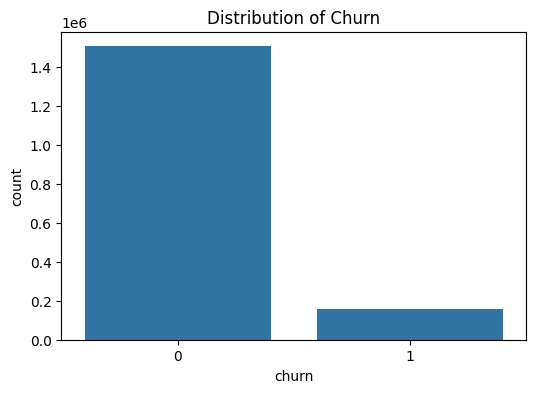

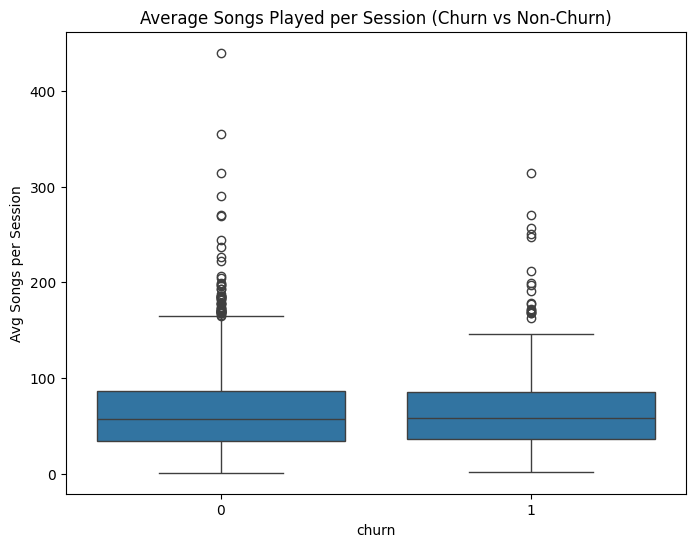

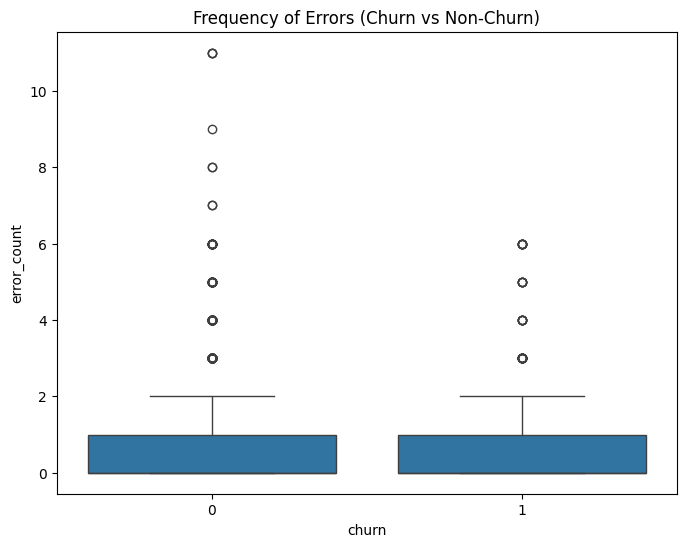

In [7]:
# Plot distribution of Churn
plot_churn_distribution(df)

# Average songs played per session for Churners vs. Non-Churners
plot_avg_songs_per_session(df)

# Frequencies of errors
plot_error_frequency(df)

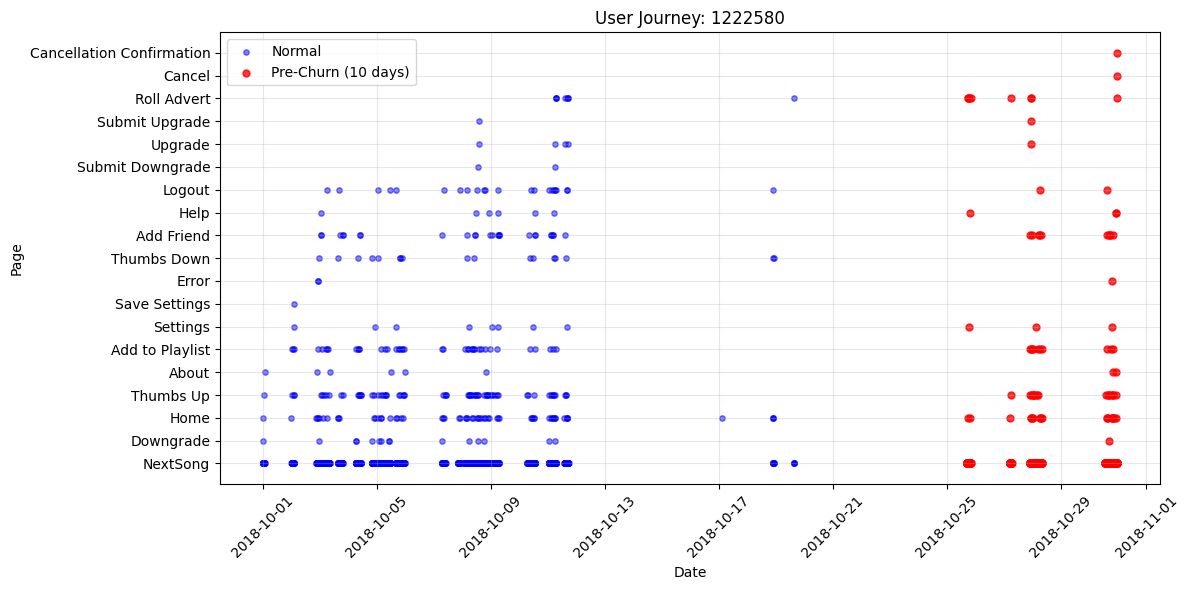

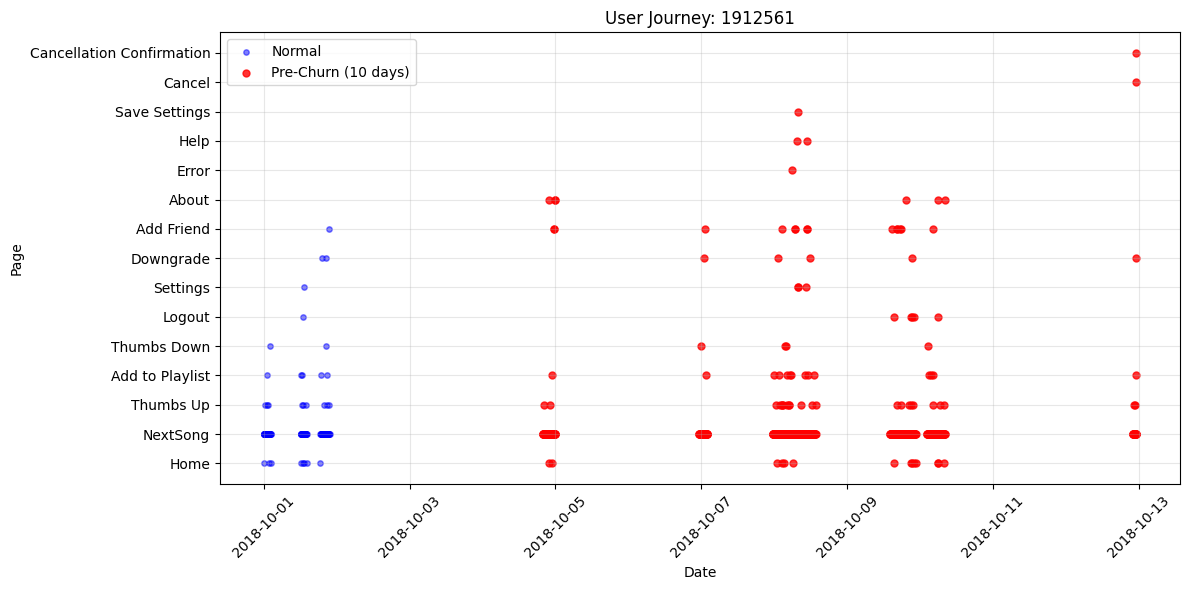

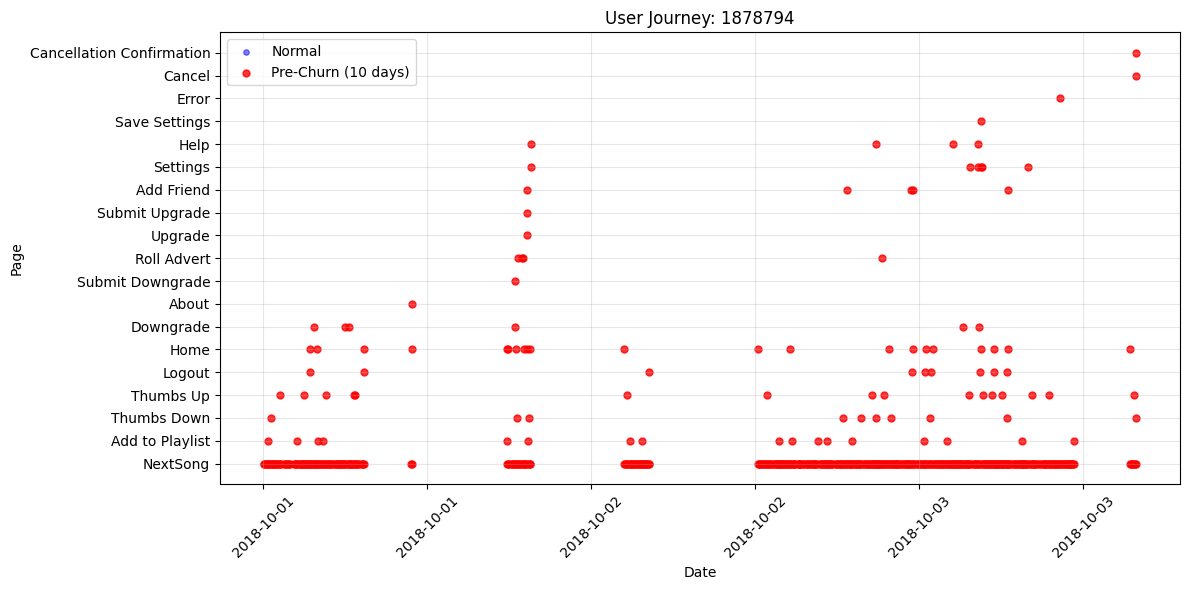

In [8]:
# Visualization of standard users journey to churn
# Get list of churn users from the dataframe
churn_users = df[df['churn_ts'].notna()]['userId'].unique()

# Pick a few churn users, ensuring we include the target user if present
target_user = '1878794'
sample_churn_users = list(churn_users[:3])
if target_user in churn_users and target_user not in sample_churn_users:
    sample_churn_users.append(target_user)

if len(sample_churn_users) > 0:
    plot_user_journeys(df, sample_churn_users)
else:
    print("No churn users found to visualize.")